In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv('/content/Flight_Booking.csv')

In [79]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [80]:
data.shape

(300153, 12)

In [81]:
data.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [82]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

In [83]:
data.shape

(300153, 11)

In [84]:
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [85]:
data.duplicated().sum()

0

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [87]:
for i in data.columns:
  print(data[i].value_counts())

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64
Mumbai       59097
Delhi        57360
Bangalore    51

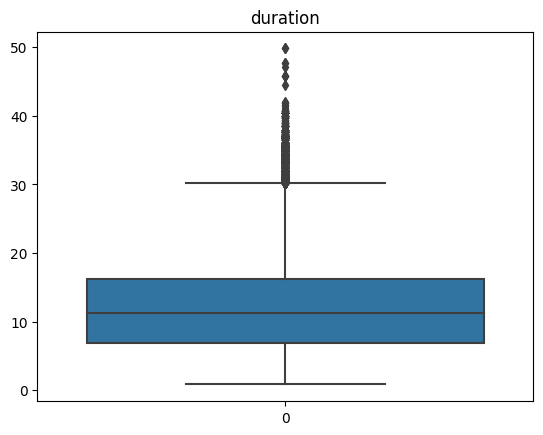

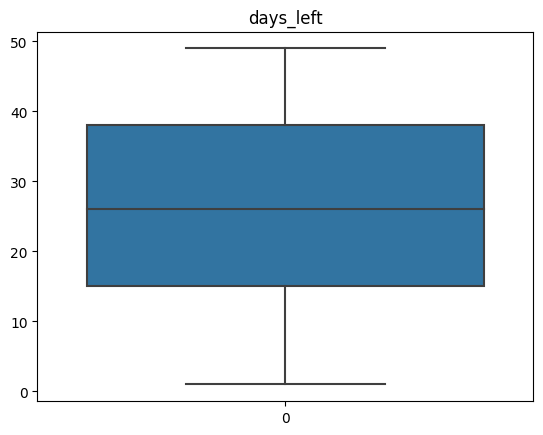

In [88]:
for i in data.columns:
  if (data[i].dtypes != 'object') & (i != 'price'):
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()


In [89]:
q3 = data['duration'].quantile(0.75)
q1 = data['duration'].quantile(0.25)
iqr = q3-q1
data = data[(data['duration']>=q1-1.5*iqr) & (data['duration']<=q3+1.5*iqr)]

In [90]:
data.shape

(298043, 11)

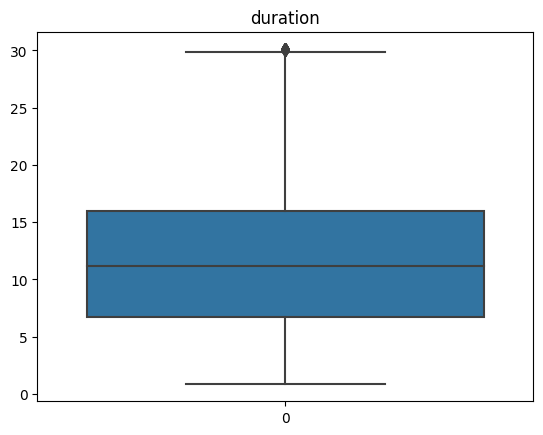

In [91]:
sns.boxplot(data['duration'])
plt.title('duration')
plt.show()

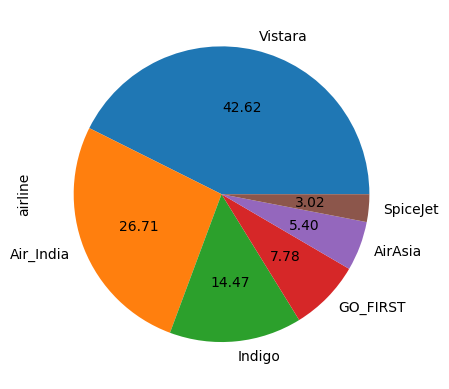

In [92]:
#Percentage of flight available
data['airline'].value_counts().plot.pie(autopct = '%0.2f')
plt.show()

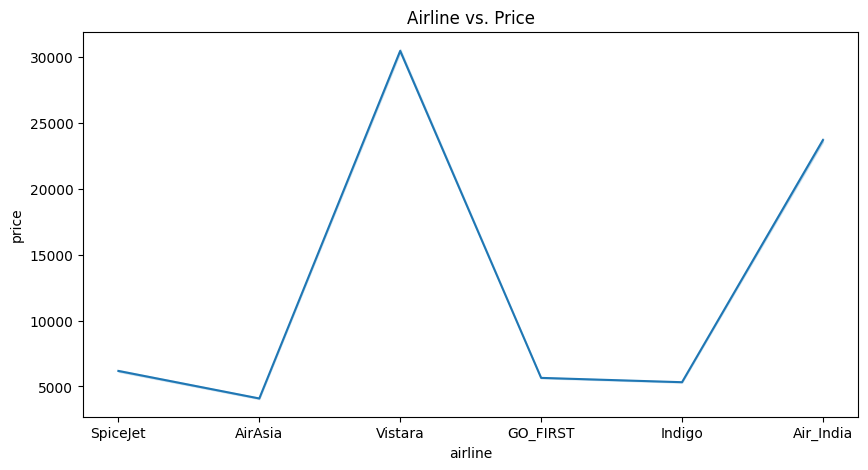

In [93]:
#variation in flight price with respect to flight vendor
plt.figure(figsize = (10,5))
sns.lineplot(x = data['airline'],y = data['price'])
plt.title('Airline vs. Price')
plt.show()

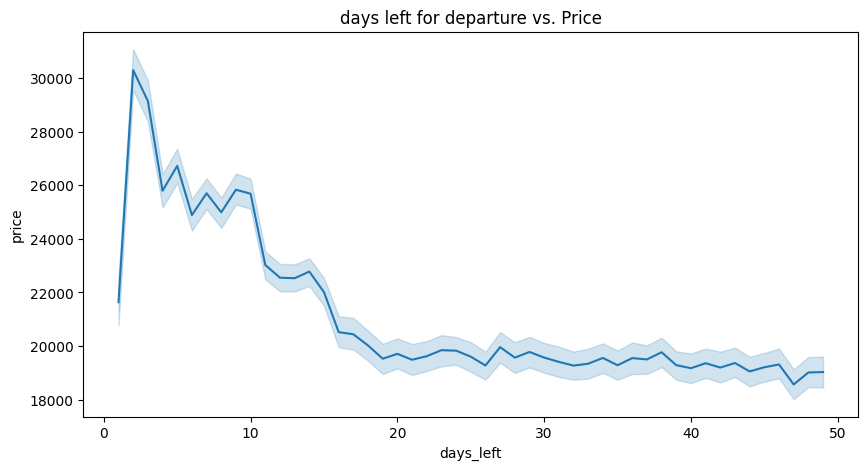

In [94]:
#The price of ticket is increasing with reducing number of days left for departure
plt.figure(figsize = (10,5))
sns.lineplot(x = data['days_left'],y = data['price'])
plt.title('days left for departure vs. Price')
plt.show()

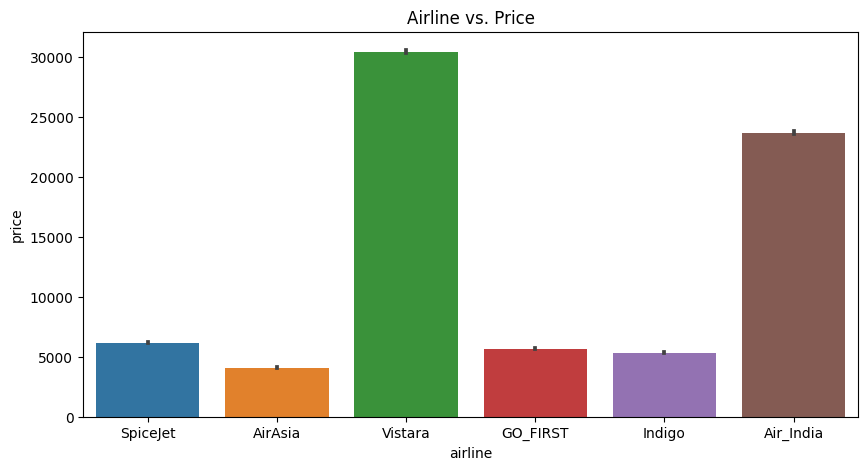

In [95]:
plt.figure(figsize = (10,5))
sns.barplot(x = data['airline'],y = data['price'])
plt.title('Airline vs. Price')
plt.show()

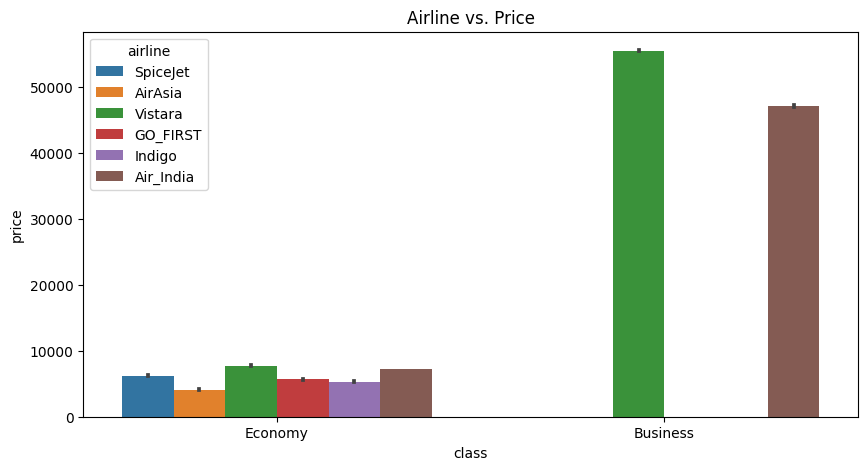

In [96]:
plt.figure(figsize = (10,5))
sns.barplot(x = data['class'],y = data['price'],hue = data['airline'])
plt.title('Airline vs. Price')
plt.show()

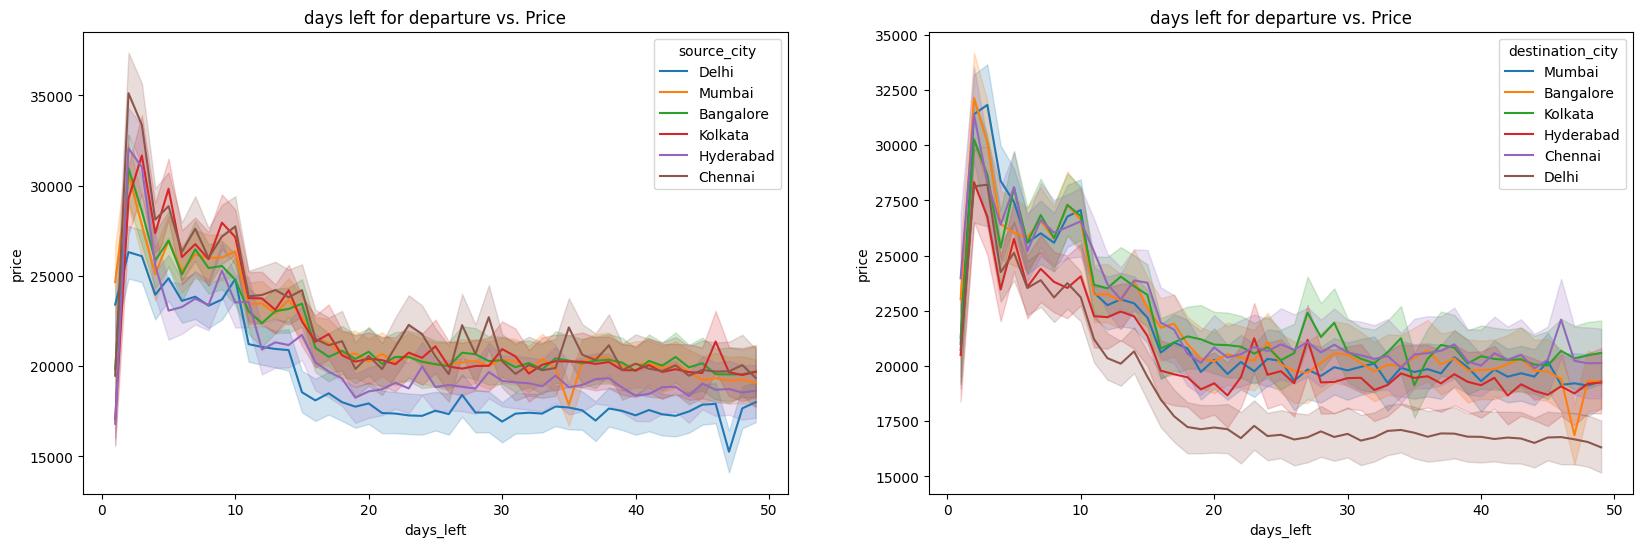

In [97]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.lineplot(x = data['days_left'],y = data['price'], hue = data['source_city'])
plt.title('days left for departure vs. Price')
plt.subplot(1,2,2)
sns.lineplot(x = data['days_left'],y = data['price'], hue = data['destination_city'])
plt.title('days left for departure vs. Price')
plt.show()

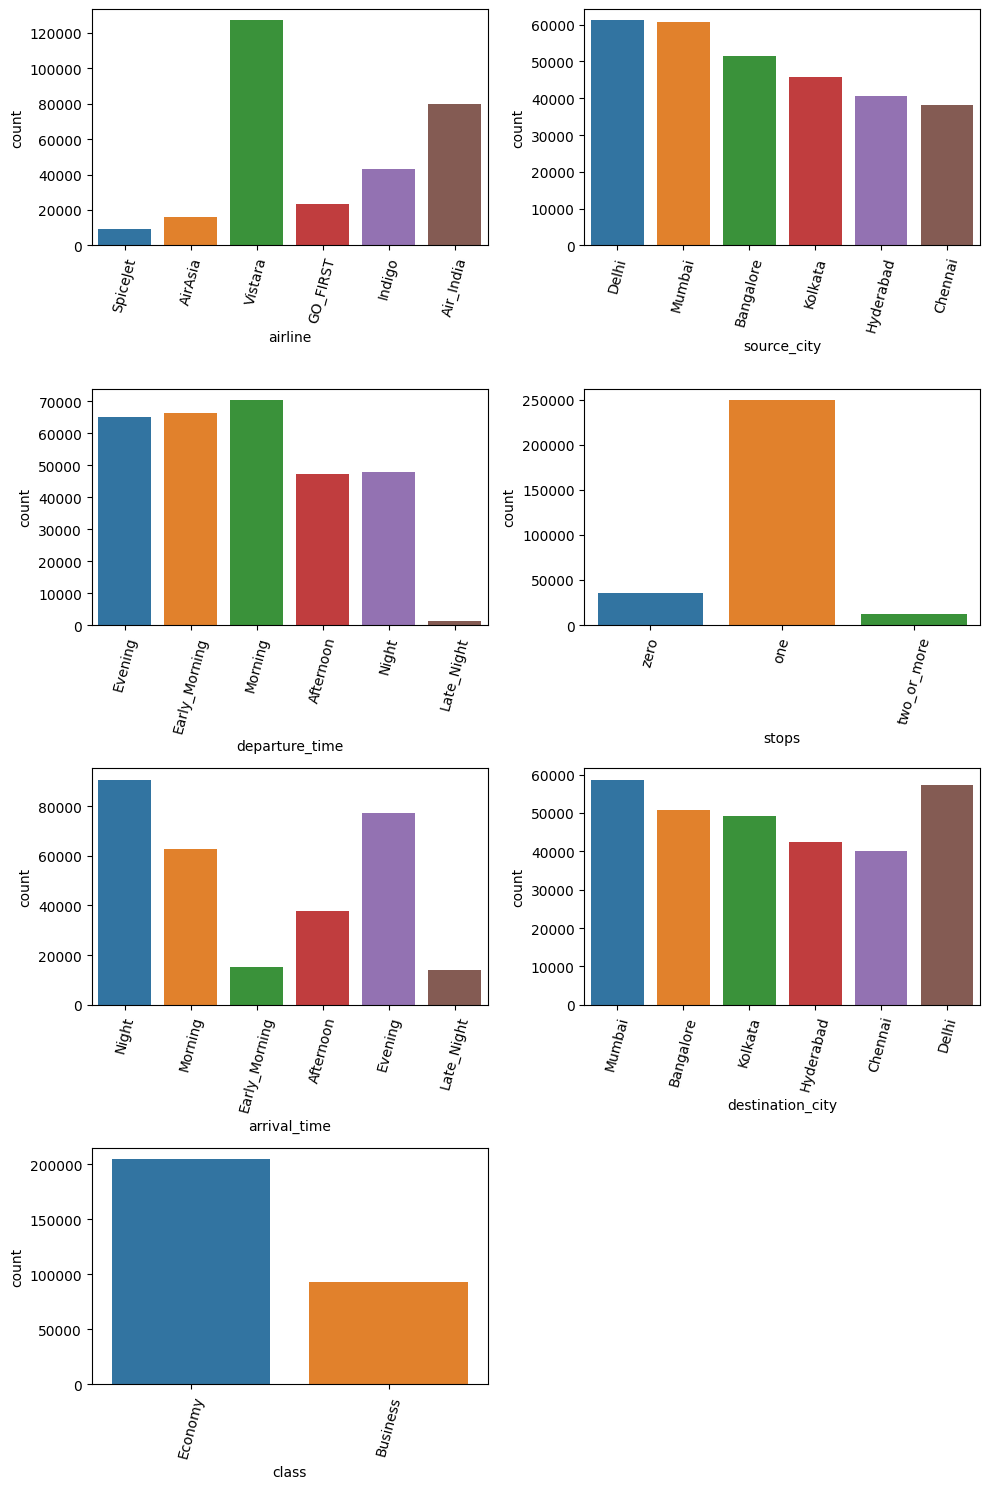

In [98]:
plt.figure(figsize = (10,15))
plt.subplot(4,2,1)
sns.countplot(x = data['airline'])
plt.xticks(rotation = 75)
plt.subplot(4,2,2)
sns.countplot(x = data['source_city'])
plt.xticks(rotation = 75)
plt.subplot(4,2,3)
sns.countplot(x = data['departure_time'])
plt.xticks(rotation = 75)
plt.subplot(4,2,4)
sns.countplot(x = data['stops'])
plt.xticks(rotation = 75)
plt.subplot(4,2,5)
sns.countplot(x = data['arrival_time'])
plt.xticks(rotation = 75)
plt.subplot(4,2,6)
sns.countplot(x = data['destination_city'])
plt.xticks(rotation = 75)
plt.subplot(4,2,7)
sns.countplot(x = data['class'])
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
le = LabelEncoder()

In [101]:
for i in data.columns:
  if data[i].dtypes == 'object':
    data[i] = le.fit_transform(data[i])

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298043 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  int64  
 1   flight            298043 non-null  int64  
 2   source_city       298043 non-null  int64  
 3   departure_time    298043 non-null  int64  
 4   stops             298043 non-null  int64  
 5   arrival_time      298043 non-null  int64  
 6   destination_city  298043 non-null  int64  
 7   class             298043 non-null  int64  
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 35.3 MB


<Axes: >

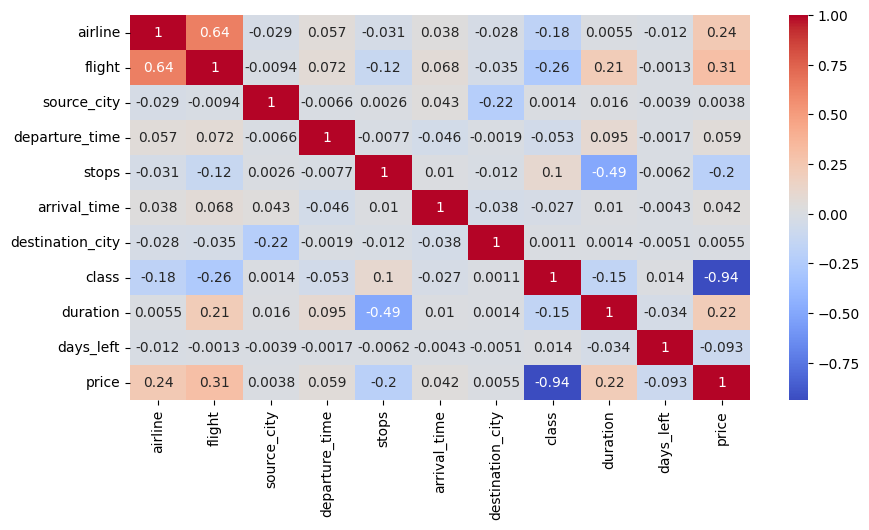

In [113]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True, cmap = 'coolwarm')

In [103]:
x = data.drop('price',axis = 1)
y = data['price']

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
VIF = pd.DataFrame()
VIF['features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,features,VIF
0,airline,6.689526
1,flight,12.669710
2,source_city,2.986146
3,departure_time,2.827307
4,stops,1.465243
5,arrival_time,3.788617
6,destination_city,2.924536
7,class,2.838307
8,duration,5.002244
9,days_left,4.086181


In [106]:
x.drop('flight',axis =1,inplace = True)

In [107]:
VIF = pd.DataFrame()
VIF['features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,features,VIF
0,airline,3.410496
1,source_city,2.947244
2,departure_time,2.803678
3,stops,1.452100
4,arrival_time,3.690991
5,destination_city,2.892704
6,class,2.835827
7,duration,4.316142
8,days_left,3.995633


In [126]:
data1 = data.drop('flight',axis = 1)

In [125]:
from pycaret.regression import *

In [127]:
se = setup(data1,target = 'price',session_id = 222)

,Description,Value
0,Session id,222
1,Target,price
2,Target type,Regression
3,Original data shape,"(298043, 10)"
4,Transformed data shape,"(298043, 10)"
5,Transformed train set shape,"(208630, 10)"
6,Transformed test set shape,"(89413, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [129]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1134.5976,7994523.0540,2827.2822,0.9845,0.1427,0.0751,53.4730
et,Extra Trees Regressor,1197.9237,9008213.1024,3001.1006,0.9826,0.1541,0.0816,39.6870
xgboost,Extreme Gradient Boosting,2043.9769,12663349.1284,3558.4252,0.9755,0.2061,0.1501,1.4750
dt,Decision Tree Regressor,1224.6944,12996813.0134,3604.7994,0.9749,0.1793,0.0792,0.9340
lightgbm,Light Gradient Boosting Machine,2368.5565,15897010.2440,3986.9666,0.9693,0.2353,0.1791,5.0290
gbr,Gradient Boosting Regressor,2961.0225,24735216.5016,4973.3021,0.9522,0.2669,0.2096,17.3560
ada,AdaBoost Regressor,3867.4143,36622399.0538,6047.5908,0.9292,0.3748,0.3453,6.4050
br,Bayesian Ridge,4645.6561,49420388.8639,7029.8551,0.9045,0.6190,0.4382,0.1040
llar,Lasso Least Angle Regression,4645.3527,49420390.8159,7029.8551,0.9045,0.6183,0.4381,0.0800
lar,Least Angle Regression,4645.6418,49420382.3936,7029.8547,0.9045,0.6190,0.4382,0.1870


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [132]:
best.fit(xtrain,ytrain)

RandomForestRegressor(n_jobs=-1, random_state=222)

In [133]:
ypred_rf = best.predict(xtest)

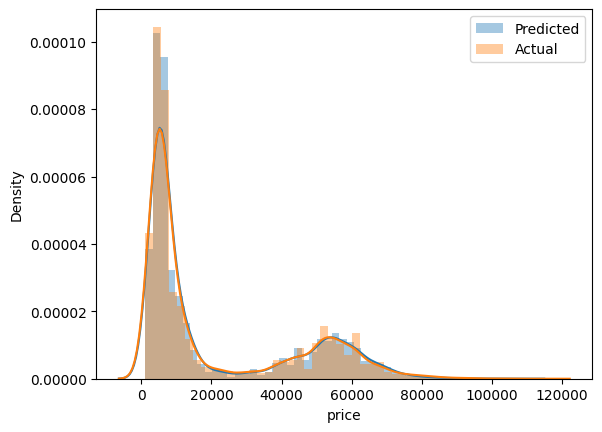

In [138]:
sns.distplot(ypred_rf,label = 'Predicted')
sns.distplot(ytest, label = 'Actual')
plt.legend()